In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")


In [17]:
# Load all datasets
# Diabetes
df_diabetes = pd.read_csv("diabetes.csv")  # Outcome

# Heart Disease
df_heart = pd.read_csv("heart.csv")        # output

# Breast Cancer
from sklearn.datasets import load_breast_cancer
data_cancer = load_breast_cancer()
df_cancer = pd.DataFrame(data_cancer.data, columns=data_cancer.feature_names)
df_cancer['target'] = data_cancer.target


In [19]:
from sklearn.preprocessing import LabelEncoder

def run_pipeline(df, target_column, dataset_name):
    print(f"\n\n================== {dataset_name.upper()} ==================")
    
    #  Check if target exists
    if target_column not in df.columns:
        print(f"❌ Target column '{target_column}' not found in dataset.")
        print("Available columns:", df.columns.tolist())
        return

    #  Split features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]

    #  Encode categorical columns
    for col in X.columns:
        if X[col].dtype == 'object':
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col])

    #  Feature Scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    #  Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )

    #  Models
    models = {
        "Logistic Regression": LogisticRegression(),
        "SVM": SVC(kernel='linear', probability=True),
        "Random Forest": RandomForestClassifier(n_estimators=100),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    }

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[name] = acc

        print(f"\n--- {name} ---")
        print("Accuracy:", acc)
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        print("Classification Report:\n", classification_report(y_test, y_pred))

    # Accuracy Plot
    plt.figure(figsize=(8, 5))
    sns.barplot(x=list(results.keys()), y=list(results.values()))
    plt.title(f"{dataset_name} - Model Accuracy Comparison")
    plt.ylim(0.5, 1.0)
    plt.ylabel("Accuracy")
    plt.xticks(rotation=15)
    plt.show()




================== DIABETES ==================

--- Logistic Regression ---
Accuracy: 0.7532467532467533
Confusion Matrix:
 [[79 20]
 [18 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


--- SVM ---
Accuracy: 0.7597402597402597
Confusion Matrix:
 [[81 18]
 [19 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154


--- Random Forest ---
Accuracy: 0.7402597402597403
Confusion Matrix:
 [[

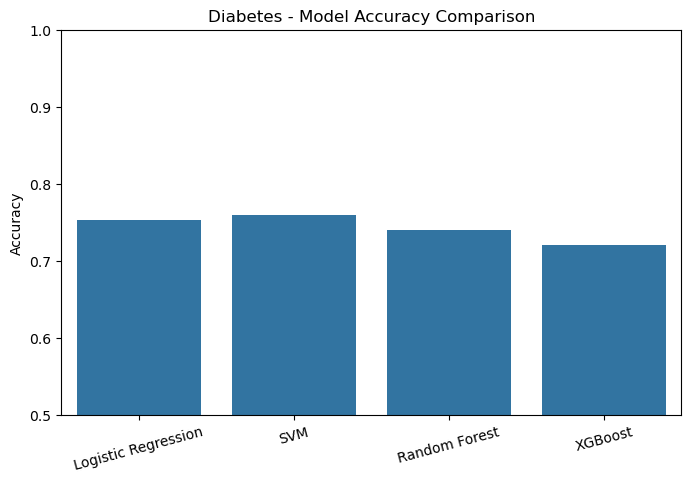

In [11]:
# Diabetes: label column is 'Outcome'
run_pipeline(df_diabetes, 'Outcome', 'Diabetes')




================== HEART DISEASE ==================

--- Logistic Regression ---
Accuracy: 0.8478260869565217
Confusion Matrix:
 [[68  9]
 [19 88]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184


--- SVM ---
Accuracy: 0.8369565217391305
Confusion Matrix:
 [[66 11]
 [19 88]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.81        77
           1       0.89      0.82      0.85       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184


--- Random Forest ---
Accuracy: 0.8913043478260869
Confusion Matrix

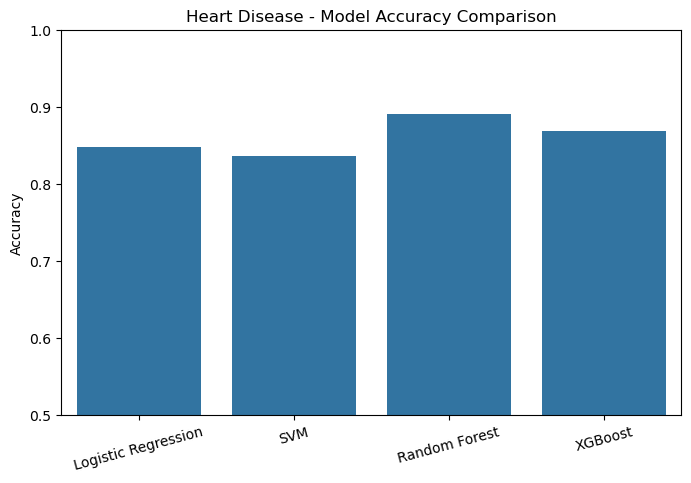

In [21]:
# Heart: label column is 'output' 
run_pipeline(df_heart, 'HeartDisease', 'Heart Disease')



================== BREAST CANCER ==================

--- Logistic Regression ---
Accuracy: 0.9736842105263158
Confusion Matrix:
 [[41  2]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


--- SVM ---
Accuracy: 0.956140350877193
Confusion Matrix:
 [[41  2]
 [ 3 68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114


--- Random Forest ---
Accuracy: 0.9649122807017544
Confusion Matrix:

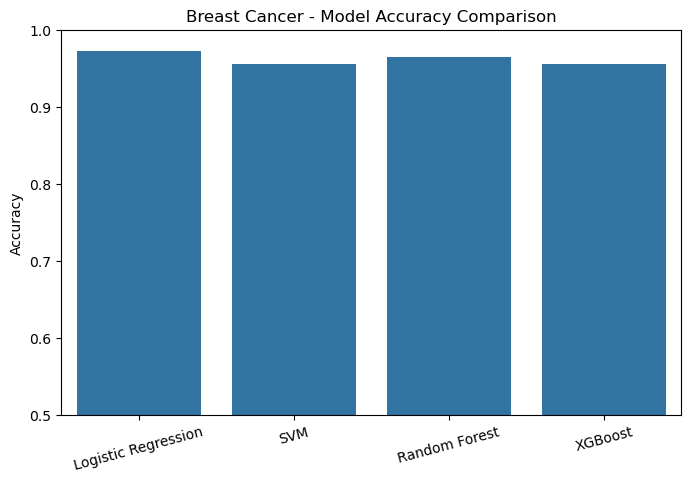

In [23]:

# Breast Cancer: label column is 'target'
run_pipeline(df_cancer, 'target', 'Breast Cancer')